In [1]:
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

# all states
N_STATES = 19

# discount
GAMMA = 1

# all states but terminal states
STATES = np.arange(1, N_STATES + 1)

# start from the middle state
START_STATE = 10

# two terminal states
# an action leading to the left terminal state has reward -1
# an action leading to the right terminal state has reward 1
END_STATES = [0, N_STATES + 1]

# true state value from bellman equation
TRUE_VALUE = np.arange(-20, 22, 2) / 20.0
TRUE_VALUE[0] = TRUE_VALUE[-1] = 0

# n-steps TD method
# @value: values for each state, will be updated
# @n: # of steps
# @alpha: # step size
def temporal_difference(value, n, alpha):
    # initial starting state
    state = START_STATE

    # arrays to store states and rewards for an episode
    # space isn't a major consideration, so I didn't use the mod trick
    states = [state]
    rewards = [0]

    # track the time
    time = 0

    # the length of this episode
    T = float('inf')
    while True:
        # go to next time step
        time += 1

        if time < T:
            # choose an action randomly
            if np.random.binomial(1, 0.5) == 1:
                next_state = state + 1
            else:
                next_state = state - 1

            if next_state == 0:
                reward = -1
            elif next_state == 20:
                reward = 1
            else:
                reward = 0

            # store new state and new reward
            states.append(next_state)
            rewards.append(reward)

            if next_state in END_STATES:
                T = time

        # get the time of the state to update
        update_time = time - n
        if update_time >= 0:
            returns = 0.0
            # calculate corresponding rewards
            for t in range(update_time + 1, min(T, update_time + n) + 1):
                returns += pow(GAMMA, t - update_time - 1) * rewards[t]
            # add state value to the return
            if update_time + n <= T:
                returns += pow(GAMMA, n) * value[states[(update_time + n)]]
            state_to_update = states[update_time]
            # update the state value
            if not state_to_update in END_STATES:
                value[state_to_update] += alpha * (returns - value[state_to_update])
        if update_time == T - 1:
            break
        state = next_state

# Figure 7.2, it will take quite a while
def figure7_2():
    # all possible steps
    steps = np.power(2, np.arange(0, 10))

    # all possible alphas
    alphas = np.arange(0, 1.1, 0.1)

    # each run has 10 episodes
    episodes = 10

    # perform 100 independent runs
    runs = 100

    # track the errors for each (step, alpha) combination
    errors = np.zeros((len(steps), len(alphas)))
    for run in tqdm(range(0, runs)):
        for step_ind, step in enumerate(steps):
            for alpha_ind, alpha in enumerate(alphas):
                # print('run:', run, 'step:', step, 'alpha:', alpha)
                value = np.zeros(N_STATES + 2)
                for ep in range(0, episodes):
                    temporal_difference(value, step, alpha)
                    # calculate the RMS error
                    errors[step_ind, alpha_ind] += np.sqrt(np.sum(np.power(value - TRUE_VALUE, 2)) / N_STATES)
    # take average
    errors /= episodes * runs

    for i in range(0, len(steps)):
        plt.plot(alphas, errors[i, :], label='n = %d' % (steps[i]))
    plt.xlabel('alpha')
    plt.ylabel('RMS error')
    plt.ylim([0.25, 0.55])
    plt.legend()

#     plt.savefig('../images/figure_7_2.png')
    plt.show()
#     plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:00<00:00,  4.80s/it]


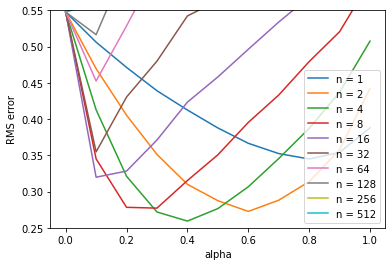

In [2]:
figure7_2()